Accuracy of the model is: 0.7213114754098361
[[12  1  3]
 [ 4 15  3]
 [ 0  6 17]]
              precision    recall  f1-score   support

           0       0.75      0.75      0.75        16
           1       0.68      0.68      0.68        22
           2       0.74      0.74      0.74        23

    accuracy                           0.72        61
   macro avg       0.72      0.72      0.72        61
weighted avg       0.72      0.72      0.72        61

output: [2 1 0 0 2 1 0 1 1 2 0 1 1 1 0 2 0 2 0 2 1 1 1 1 2 2 1 0 1 2 1 0 2 2 0 2 0
 2 0 0 2 2 0 1 1 1 1 1 0 2 2 1 1 2 2 2 1 0 2 2 2]


Text(0.5, 1.0, 'Confusion matrix of descision tree')

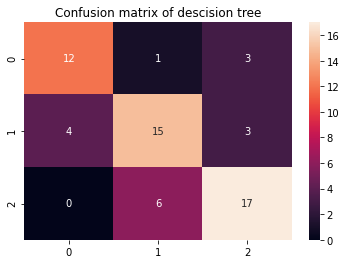

In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn import preprocessing
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
%matplotlib inline

def convert(data):
    number = preprocessing.LabelEncoder()
    data['age'] = number.fit_transform(data.age)
    data['gender'] = number.fit_transform(data.gender)
    data['type'] = number.fit_transform(data.type)
    data['gradeVA'] = number.fit_transform(data.gradeVA)
    data['RAPD'] = number.fit_transform(data.RAPD)
    data['zone'] = number.fit_transform(data.zone)
    data['traumaticcataract'] = number.fit_transform(data.traumaticcataract)
    data['TON'] = number.fit_transform(data.TON)
    data['FB'] = number.fit_transform(data.FB)
    data['RD'] = number.fit_transform(data.RD)
    data['Endophthalmitis'] = number.fit_transform(data.Endophthalmitis)
    data['OTStotalscore'] = number.fit_transform(data.OTStotalscore)
    data['lastFUBGrade'] = number.fit_transform(data.lastFUBGrade)   
    data=data.fillna(-999)
    return data

ogidata = pd.read_csv("normalizedogithreeCat.csv")
ogidata = convert(ogidata)
temp = ogidata.drop('lastFUBGrade', axis=1)
y = ogidata['lastFUBGrade']
X  = (temp-np.min(temp))/(np.max(temp)-np.min(temp))
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)


model = DecisionTreeClassifier()


model.fit(X_train,y_train)

y_pred = model.predict(X_test)


accuracy = accuracy_score(y_test,y_pred)

print("Accuracy of the model is:",accuracy)

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print ("output:", y_pred)
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm, annot=True, fmt='d').set_title('Confusion matrix of descision tree') # fmt='d' formats the numbers as digits, which means integers





Accuracy: 0.7419354838709677
Accuracy: 0.7
Accuracy: 0.6333333333333333
Accuracy: 0.6333333333333333
Accuracy: 0.6666666666666666
Accuracy: 0.7666666666666667
Accuracy: 0.7
Accuracy: 0.7333333333333333
Accuracy: 0.8
Accuracy: 0.7333333333333333
output: [0 1 2 2 2 2 2 2 2 2 2 2 2 2 1 1 2 1 2 1 1 2 1 1 0 1 1 0 2 1]
test accuracy: 0.7333333333333333
[[ 2  1  0]
 [ 1  7  3]
 [ 0  3 13]]
              precision    recall  f1-score   support

           0       0.67      0.67      0.67         3
           1       0.64      0.64      0.64        11
           2       0.81      0.81      0.81        16

    accuracy                           0.73        30
   macro avg       0.71      0.71      0.71        30
weighted avg       0.73      0.73      0.73        30

output: [0 1 2 2 2 2 2 2 2 2 2 2 2 2 1 1 2 1 2 1 1 2 1 1 0 1 1 0 2 1]


Text(0.5, 1.0, 'Confusion matrix of descision tree')

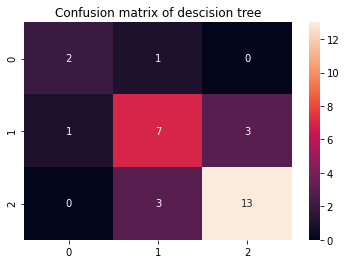

In [2]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn import preprocessing
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
%matplotlib inline

def convert(data):
    number = preprocessing.LabelEncoder()
    data['age'] = number.fit_transform(data.age)
    data['gender'] = number.fit_transform(data.gender)
    data['type'] = number.fit_transform(data.type)
    data['gradeVA'] = number.fit_transform(data.gradeVA)
    data['RAPD'] = number.fit_transform(data.RAPD)
    data['zone'] = number.fit_transform(data.zone)
    data['traumaticcataract'] = number.fit_transform(data.traumaticcataract)
    data['TON'] = number.fit_transform(data.TON)
    data['FB'] = number.fit_transform(data.FB)
    data['RD'] = number.fit_transform(data.RD)
    data['Endophthalmitis'] = number.fit_transform(data.Endophthalmitis)
    data['OTStotalscore'] = number.fit_transform(data.OTStotalscore)
    data['lastFUBGrade'] = number.fit_transform(data.lastFUBGrade)   
    data=data.fillna(-999)
    return data

ogidata = pd.read_csv("normalizedogithreeCat.csv")
ogidata = convert(ogidata)
temp = ogidata.drop('lastFUBGrade', axis=1)
y = ogidata['lastFUBGrade']
X  = (temp-np.min(temp))/(np.max(temp)-np.min(temp))


kf = KFold(n_splits=10, random_state=42, shuffle=True)

model = DecisionTreeClassifier()
for train_index, test_index in kf.split(X):
   #split the data
   X_train, X_test = X.iloc[train_index], X.iloc[test_index]
   y_train, y_test = y.iloc[train_index], y.iloc[test_index]
   #fit the model
   model.fit(X_train, y_train)
   #make predictions
   predictions = model.predict(X_test)
   #calculate accuracy
   accuracy = model.score(X_test, y_test)
   print('Accuracy:', accuracy)
    
print ("output:", predictions) 
print("test accuracy:",model.score(X_test,y_test))

print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))
print ("output:", predictions)
cm = confusion_matrix(y_test,predictions)
sns.heatmap(cm, annot=True, fmt='d').set_title('Confusion matrix of descision tree') # fmt='d' formats the numbers as digits, which means integers



